In [1]:
import os, sys
sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))

import matplotlib.pyplot as plt
from src.utils.utils import *
import seaborn as sns

sns.set()

# Dicionário de metadados

## Função para Criar os gráficos

In [2]:
def create_bar(full, cmmd, ddsm, inbreast,label):
    fig = plt.figure(figsize=(14, 12))
    gs = fig.add_gridspec(3, 2)

    ax1 = plt.subplot(gs[0, ::])
    ax = sns.barplot(x='frequencia', y=label, ax=ax1, data=full)
    ax1.set_title(f"Quantidade de {label} por frequência - Total", size=14, pad=20)
    ax1.set_xlabel("Frequência", size=14)
    ax1.set_ylabel(f"Quantidade de {label}", size=14)
    ax1.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax2 = plt.subplot(gs[1:2, :1:])
    ax = sns.barplot(x='frequencia', y=label, ax=ax2, data=cmmd)
    ax2.set_title(f"Quantidade de {label} por frequência - CMMD", size=14, pad=20)
    ax2.set_xlabel("Frequência", size=14)
    ax2.set_ylabel(f"Quantidade de {label}", size=14)
    ax2.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax3 = plt.subplot(gs[1:2, 1::])
    ax = sns.barplot(x='frequencia', y=label, ax=ax3, data=ddsm)
    ax3.set_title(f"Quantidade de {label} por frequência - CBIS-DDSM", size=14, pad=20)
    ax3.set_xlabel("Frequência", size=14)
    ax3.set_ylabel(f"Quantidade de {label}", size=14)
    ax3.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")
    
    ax4 = plt.subplot(gs[2, :1:])
    ax = sns.barplot(x='frequencia', y=label, ax=ax4, data=inbreast)
    ax4.set_title(f"Quantidade de {label} por frequência - INBreast", size=14, pad=20)
    ax4.set_xlabel("Frequência", size=14)
    ax4.set_ylabel(f"Quantidade de {label}", size=14)
    ax4.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.show()

## Gráfico de tags do cabeçalho

### Quantidade de tags por frequência dos bancos CMMD, INBREAST e CBIS-DDSM

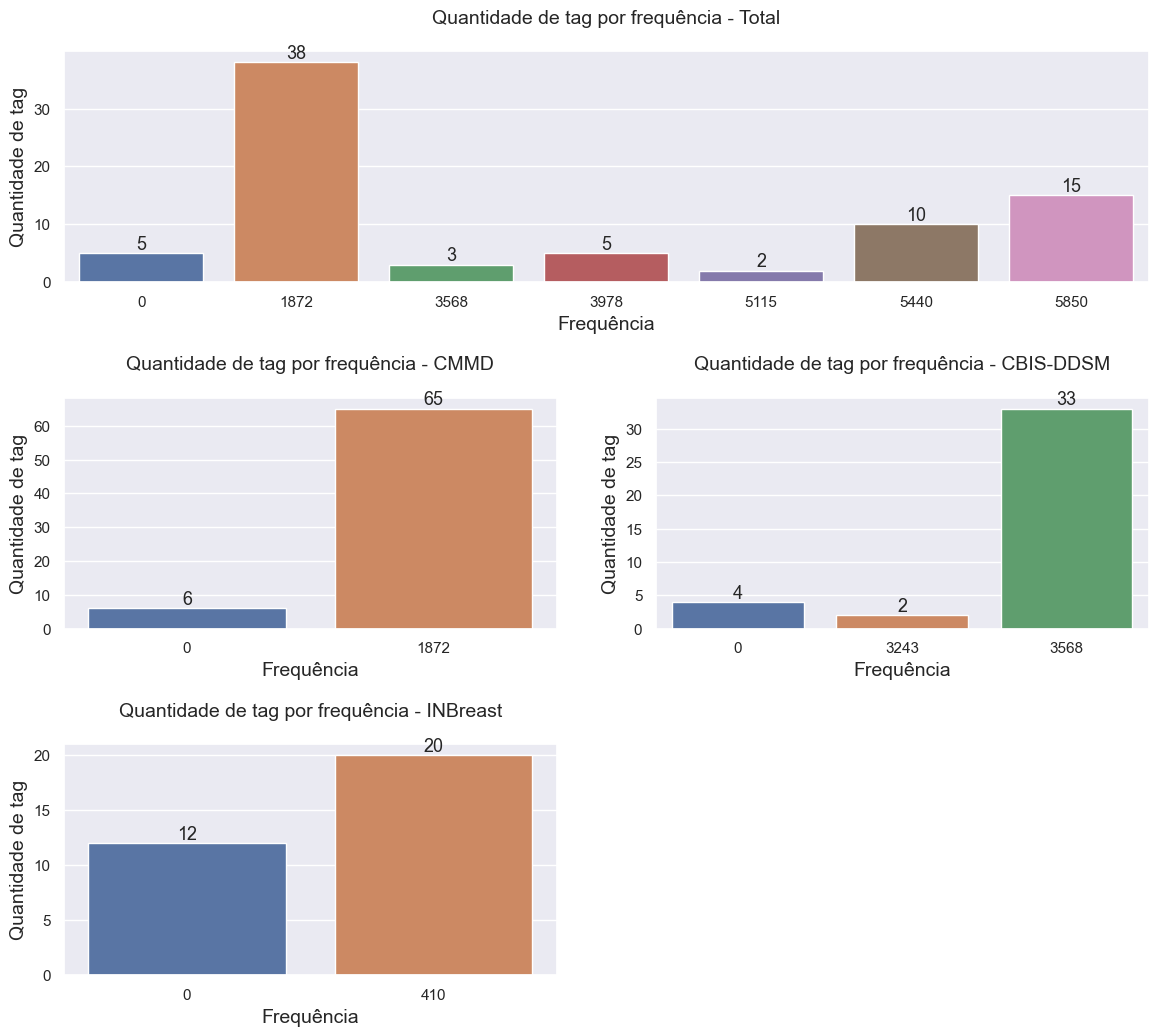

In [3]:
full_dictionary = load_json("full_dictionary_dicom_pgm", "../../outputs/mamografia/dictionary_metadata/dicom_pgm")
dictionary_cbis_ddsm = load_json("dictionary_dicom_CBIS-DDSM", "../../outputs/mamografia/dictionary_metadata/dicom_pgm")
dictionary_cmmd = load_json("dictionary_dicom_CMMD", "../../outputs/mamografia/dictionary_metadata/dicom_pgm")
dictionary_inbreast = load_json("dictionary_dicom_INBREAST", "../../outputs/mamografia/dictionary_metadata/dicom_pgm")
dictionary_mias = load_json("dictionary_pgm_MIAS", "../../outputs/mamografia/dictionary_metadata/dicom_pgm")

df_cmmd = create_df(dictionary_cmmd, 'tag')
df_cbis_ddsm = create_df(dictionary_cbis_ddsm, 'tag')
df_inbreast = create_df(dictionary_inbreast, 'tag')
df_mias = create_df(dictionary_mias, 'tag')
df_full = create_df(full_dictionary, 'tag')

full = df_full.groupby("frequencia", as_index=False).count()
cbis_ddsm = df_cbis_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()
inbreast = df_inbreast.groupby("frequencia", as_index=False).count()
mias = df_mias.groupby("frequencia", as_index=False).count()

create_bar(full, cmmd, cbis_ddsm, inbreast, 'tag')

### Frequência das tags do banco MIAS

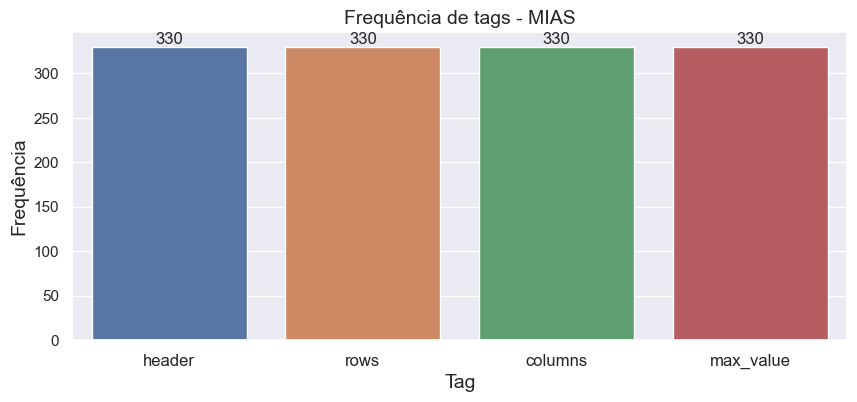

In [4]:
fig = plt.figure(figsize=(10, 4))
ax = sns.barplot(data=df_mias, x='tag', y='frequencia')
plt.title("Frequência de tags - MIAS", size=14)
plt.xlabel("Tag", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=0, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Buscar tags pela frequência

In [5]:
"""---Opcões de parâmetros para função buscar_tags---
    Dataframe: df_full - Frequencias possíveis: [0, 1872, 3568, 3978, 5115, 5440, 5850]
    Dataframe: df_cmmd - Frequencias possíveis: [0, 1872]
    Dataframe: df_cbis_ddsm - Frequencias possíveis: [0, 3243, 3568]
    DataFrame: df_inbreast - Frequencias possíveis: [0, 410]
    Dataframe: df_mias - Frequencias possíveis: [330]
"""
buscar_tags(df_full, 5850)

,tag,frequencia
0,"sop_instance_uid (0008, 0018)",5850
1,"high_bit (0028, 0102)",5850
2,"bits_allocated (0028, 0100)",5850
3,"columns (0028, 0011)",5850
4,"content_date (0008, 0023)",5850
5,"modality (0008, 0060)",5850
6,"pixel_representation (0028, 0103)",5850
7,"sop_class_uid (0008, 0016)",5850
8,"series_instance_uid (0020, 000e)",5850
9,"study_instance_uid (0020, 000d)",5850


In [6]:
buscar_tags(df_full, 5850)[['tag']].to_csv("../../outputs/inserts_mongodb/required_dicom.csv", index=False)

df_tmp = pd.DataFrame()

freqs_optional = [3568, 3978, 5115, 5440]
for freq in freqs_optional:
    df_tmp = pd.concat([df_tmp, buscar_tags(df_full, freq)])
df_tmp = df_tmp.reset_index(drop=True)

df_tmp[['tag']].to_csv("../../outputs/inserts_mongodb/optional_dicom.csv", index=False)

## Gráfico de atributos dos arquivos CSV e TXT

### Quantidade de atributos por frequência dos bancos CMMD, DDSM e InBreast

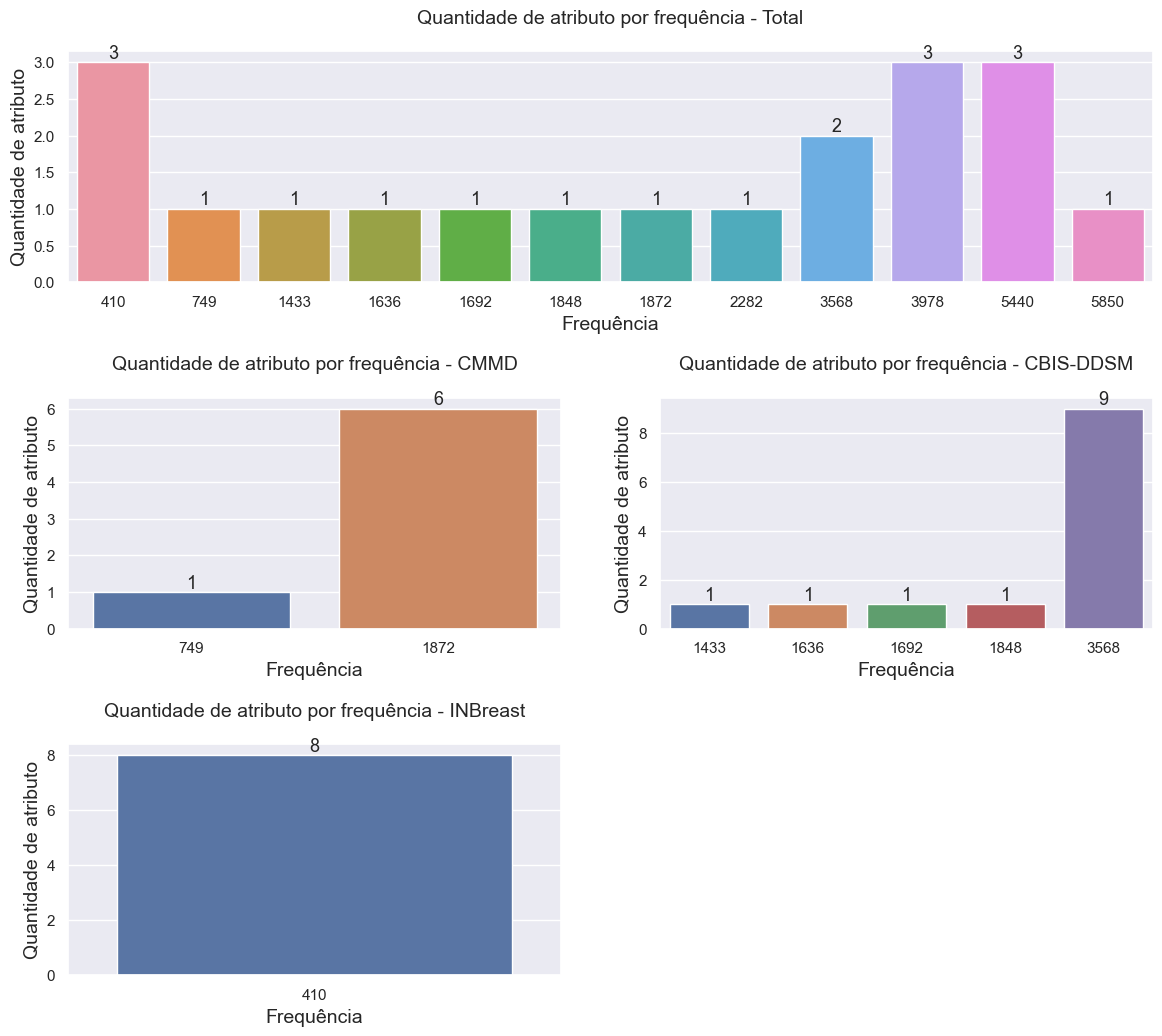

In [7]:
full_dictionary = load_json("full_dictionary_metadata", "../../outputs/mamografia/dictionary_metadata/csv_txt")
dictionary_cbis_ddsm = load_json("dictionary_csv_CBIS-DDSM", "../../outputs/mamografia/dictionary_metadata/csv_txt")
dictionary_cmmd = load_json("dictionary_csv_CMMD", "../../outputs/mamografia/dictionary_metadata/csv_txt")
dictionary_inbreast = load_json("dictionary_csv_INBREAST", "../../outputs/mamografia/dictionary_metadata/csv_txt")
dictionary_mias = load_json("dictionary_txt_MIAS", "../../outputs/mamografia/dictionary_metadata/csv_txt")

df_cmmd = create_df(dictionary_cmmd, 'atributo')
df_cbis_ddsm = create_df(dictionary_cbis_ddsm, 'atributo')
df_inbreast = create_df(dictionary_inbreast, 'atributo')
df_mias = create_df(dictionary_mias, 'atributo')
df_full = create_df(full_dictionary, 'atributo')

full = df_full.groupby("frequencia", as_index=False).count()
cbis_ddsm = df_cbis_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()
inbreast = df_inbreast.groupby("frequencia", as_index=False).count()
mias = df_mias.groupby("frequencia", as_index=False).count()

create_bar(full, cmmd, cbis_ddsm, inbreast, 'atributo')

### Frequência dos atributos do banco MIAS

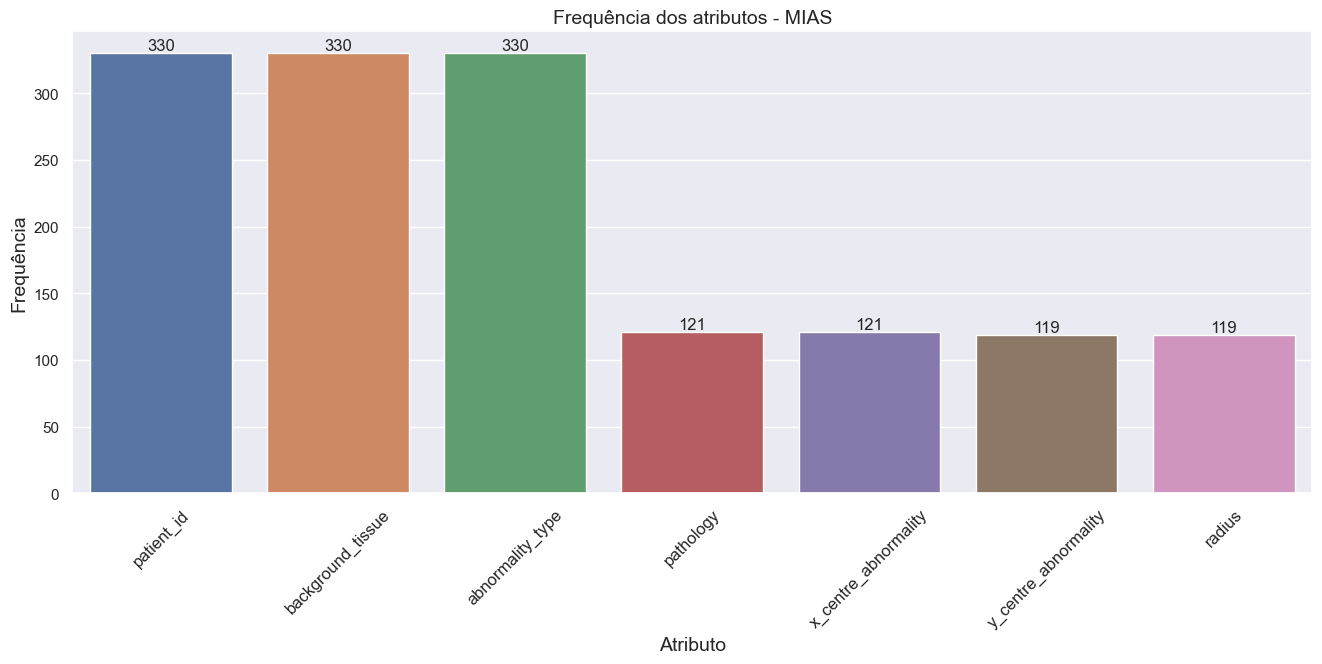

In [8]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_mias, x='atributo', y='frequencia')
plt.title("Frequência dos atributos - MIAS", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=45, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - FULL Dictionary atributes

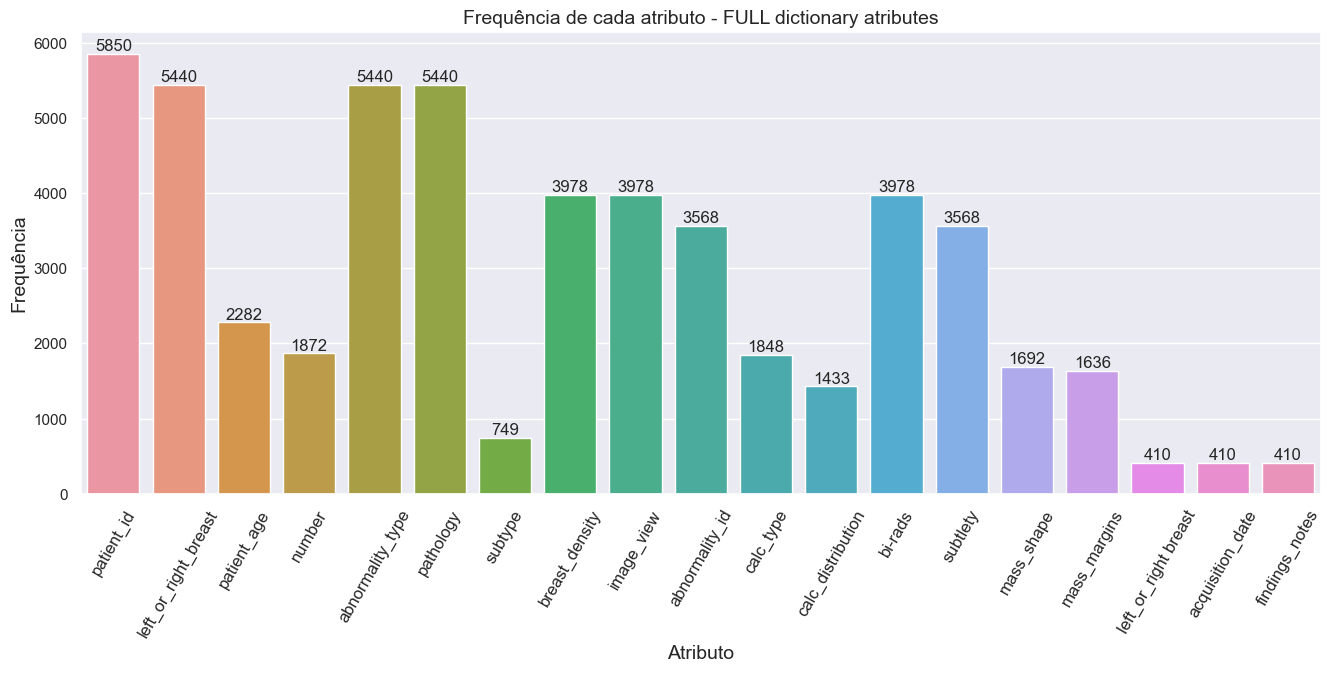

In [9]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_full, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - FULL dictionary atributes", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=60, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - CMMD

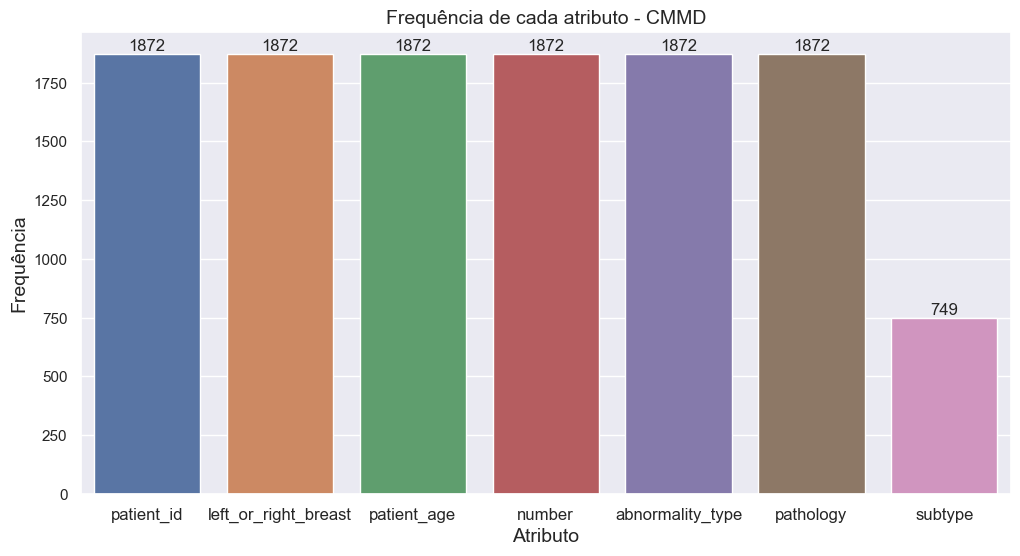

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_cmmd, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - CMMD", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=0, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - CBIS-DDSM

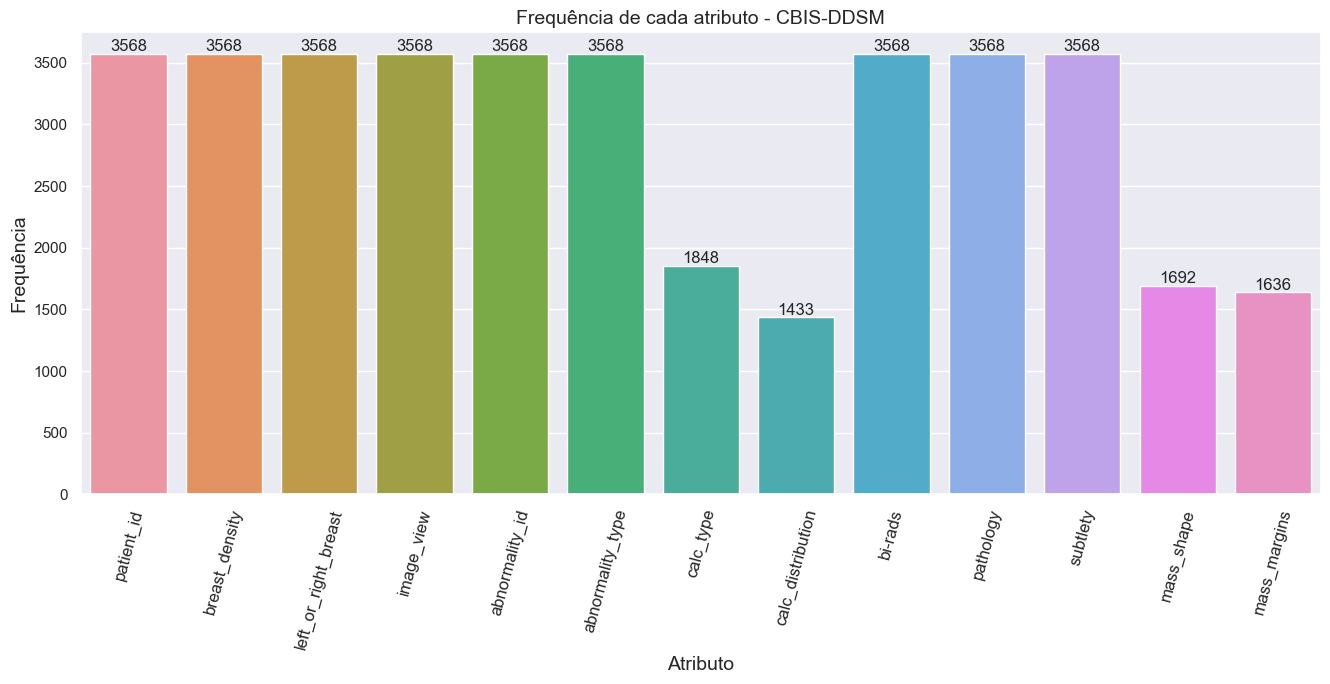

In [11]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_cbis_ddsm, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - CBIS-DDSM", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=75, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - INBreast

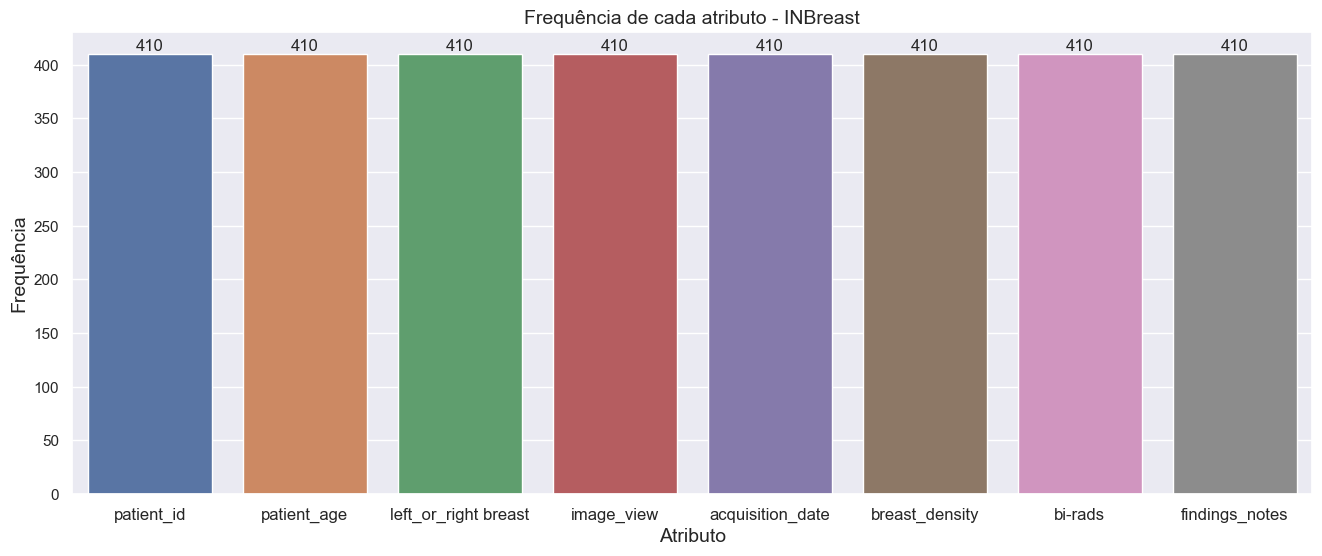

In [12]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_inbreast, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - INBreast", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=0, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - MIAS

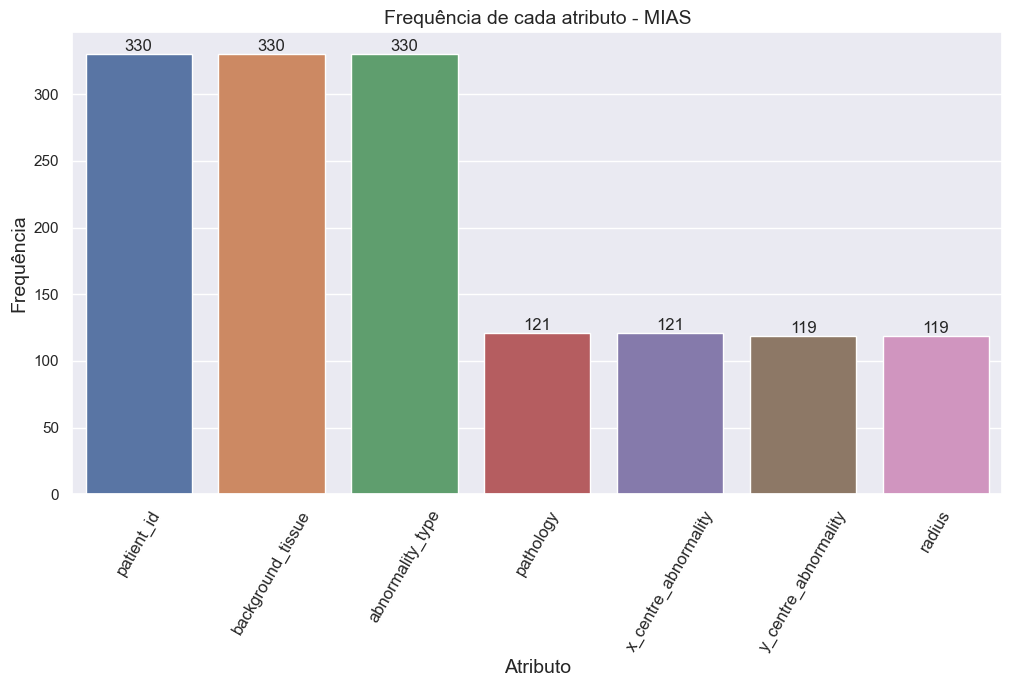

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_mias, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - MIAS", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=60, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()